In [1]:
import json, os, cv2
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
root = '/mnt/lwll/lwll-coral/hrant/gtFine/test/'
cities = os.listdir(root)
images = {city: list(set('_'.join(x.split('_')[:3]) for x in os.listdir(os.path.join(root, city)))) for city in cities}
print(sum([len(images[city]) for city in cities]))
test_images = ['/'.join(['gtFine/test', city, name]) for city in cities for name in images[city]]

1525


In [3]:
root = '/mnt/lwll/lwll-coral/hrant/gtFine/val/'
cities = os.listdir(root)
images = {city: list(set('_'.join(x.split('_')[:3]) for x in os.listdir(os.path.join(root, city)))) for city in cities}
print(sum([len(images[city]) for city in cities]))
validation_images = ['/'.join(['gtFine/val', city, name]) for city in cities for name in images[city][:10]]

500


In [8]:
root = '/mnt/lwll/lwll-coral/hrant/gtFine/train/'
cities = os.listdir(root)
images = {city: list(set('_'.join(x.split('_')[:3]) for x in os.listdir(os.path.join(root, city)))) for city in cities}
print(sum([len(images[city]) for city in cities]))
train_images = ['/'.join(['gtFine/train', city, name]) for city in cities for name in images[city][4:8]]

2975


In [9]:
len(train_images), len(validation_images), len(test_images)

(72, 30, 1525)

In [10]:
train_images # new dataset

['gtFine/train/krefeld/krefeld_000000_032845',
 'gtFine/train/krefeld/krefeld_000000_017042',
 'gtFine/train/krefeld/krefeld_000000_009404',
 'gtFine/train/krefeld/krefeld_000000_012353',
 'gtFine/train/dusseldorf/dusseldorf_000158_000019',
 'gtFine/train/dusseldorf/dusseldorf_000142_000019',
 'gtFine/train/dusseldorf/dusseldorf_000050_000019',
 'gtFine/train/dusseldorf/dusseldorf_000191_000019',
 'gtFine/train/hamburg/hamburg_000000_053486',
 'gtFine/train/hamburg/hamburg_000000_006192',
 'gtFine/train/hamburg/hamburg_000000_085073',
 'gtFine/train/hamburg/hamburg_000000_060586',
 'gtFine/train/bremen/bremen_000077_000019',
 'gtFine/train/bremen/bremen_000260_000019',
 'gtFine/train/bremen/bremen_000191_000019',
 'gtFine/train/bremen/bremen_000307_000019',
 'gtFine/train/ulm/ulm_000020_000019',
 'gtFine/train/ulm/ulm_000082_000019',
 'gtFine/train/ulm/ulm_000071_000019',
 'gtFine/train/ulm/ulm_000048_000019',
 'gtFine/train/cologne/cologne_000084_000019',
 'gtFine/train/cologne/cologn

In [6]:
train_images

['gtFine/train/krefeld/krefeld_000000_034686',
 'gtFine/train/krefeld/krefeld_000000_021553',
 'gtFine/train/krefeld/krefeld_000000_003937',
 'gtFine/train/krefeld/krefeld_000000_029050',
 'gtFine/train/dusseldorf/dusseldorf_000161_000019',
 'gtFine/train/dusseldorf/dusseldorf_000072_000019',
 'gtFine/train/dusseldorf/dusseldorf_000189_000019',
 'gtFine/train/dusseldorf/dusseldorf_000165_000019',
 'gtFine/train/hamburg/hamburg_000000_005639',
 'gtFine/train/hamburg/hamburg_000000_062371',
 'gtFine/train/hamburg/hamburg_000000_094185',
 'gtFine/train/hamburg/hamburg_000000_071016',
 'gtFine/train/bremen/bremen_000232_000019',
 'gtFine/train/bremen/bremen_000051_000019',
 'gtFine/train/bremen/bremen_000080_000019',
 'gtFine/train/bremen/bremen_000136_000019',
 'gtFine/train/ulm/ulm_000052_000019',
 'gtFine/train/ulm/ulm_000076_000019',
 'gtFine/train/ulm/ulm_000090_000019',
 'gtFine/train/ulm/ulm_000088_000019',
 'gtFine/train/cologne/cologne_000136_000019',
 'gtFine/train/cologne/cologn

In [7]:
validation_images

['gtFine/val/munster/munster_000105_000019',
 'gtFine/val/munster/munster_000058_000019',
 'gtFine/val/munster/munster_000038_000019',
 'gtFine/val/munster/munster_000106_000019',
 'gtFine/val/munster/munster_000154_000019',
 'gtFine/val/munster/munster_000069_000019',
 'gtFine/val/munster/munster_000112_000019',
 'gtFine/val/munster/munster_000003_000019',
 'gtFine/val/munster/munster_000116_000019',
 'gtFine/val/munster/munster_000151_000019',
 'gtFine/val/frankfurt/frankfurt_000001_013016',
 'gtFine/val/frankfurt/frankfurt_000001_017459',
 'gtFine/val/frankfurt/frankfurt_000000_018797',
 'gtFine/val/frankfurt/frankfurt_000001_055172',
 'gtFine/val/frankfurt/frankfurt_000001_061763',
 'gtFine/val/frankfurt/frankfurt_000000_020215',
 'gtFine/val/frankfurt/frankfurt_000001_066574',
 'gtFine/val/frankfurt/frankfurt_000001_030310',
 'gtFine/val/frankfurt/frankfurt_000001_073088',
 'gtFine/val/frankfurt/frankfurt_000001_019698',
 'gtFine/val/lindau/lindau_000044_000019',
 'gtFine/val/lind

In [4]:
test_images

['gtFine/test/bielefeld/bielefeld_000000_041223',
 'gtFine/test/bielefeld/bielefeld_000000_006802',
 'gtFine/test/bielefeld/bielefeld_000000_017438',
 'gtFine/test/bielefeld/bielefeld_000000_006603',
 'gtFine/test/bielefeld/bielefeld_000000_040035',
 'gtFine/test/bielefeld/bielefeld_000000_040472',
 'gtFine/test/bielefeld/bielefeld_000000_005741',
 'gtFine/test/bielefeld/bielefeld_000000_008581',
 'gtFine/test/bielefeld/bielefeld_000000_042571',
 'gtFine/test/bielefeld/bielefeld_000000_028550',
 'gtFine/test/bielefeld/bielefeld_000000_051102',
 'gtFine/test/bielefeld/bielefeld_000000_043100',
 'gtFine/test/bielefeld/bielefeld_000000_005068',
 'gtFine/test/bielefeld/bielefeld_000000_025748',
 'gtFine/test/bielefeld/bielefeld_000000_000856',
 'gtFine/test/bielefeld/bielefeld_000000_026660',
 'gtFine/test/bielefeld/bielefeld_000000_028046',
 'gtFine/test/bielefeld/bielefeld_000000_016019',
 'gtFine/test/bielefeld/bielefeld_000000_063623',
 'gtFine/test/bielefeld/bielefeld_000000_053779',


In [61]:
len(train_images), len(validation_images)

(72, 30)

In [24]:
with open(os.path.join(root, 'lindau', 'lindau_000035_000019_gtFine_polygons.json')) as f:
    polygons = json.load(f)

In [28]:
polygons['objects'][0]

{'label': 'building',
 'polygon': [[363, 25], [352, 397], [0, 351], [0, 0], [363, 0]]}

In [15]:
im = cv2.imread(os.path.join(root, 'lindau', 'lindau_000035_000019_gtFine_labelIds.png'))

In [16]:
im.shape

(1024, 2048, 3)

In [18]:
im[400,1000]

array([26, 26, 26], dtype=uint8)

In [22]:
im.max()

26

In [23]:
np.unique(im)

array([ 1,  3,  4,  6, 11, 17, 20, 21, 24, 26], dtype=uint8)

In [20]:
n_class = 33

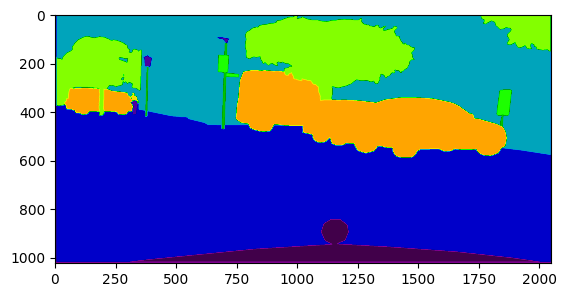

In [21]:
plt.figure()
plt.imshow(im[:,:,0], vmin=0, vmax=n_class, cmap='nipy_spectral')

In [29]:
patch_labels = cv2.resize(im[:,:,0], (14, 14))

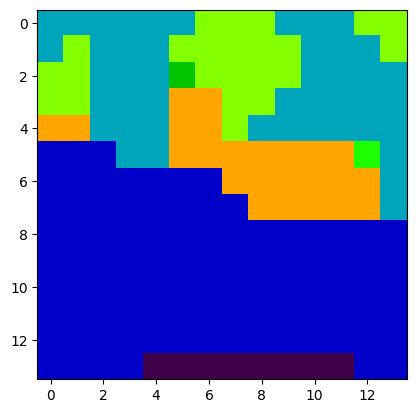

In [30]:
plt.figure()
plt.imshow(patch_labels, vmin=0, vmax=n_class, cmap='nipy_spectral')

In [72]:
x = np.array([1,2,np.nan,3])

In [73]:
x

array([ 1.,  2., nan,  3.])

In [ ]:
np.nan_to_num(x, 1)